In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as exp

In [91]:
data_books = pd.read_parquet('books_cleaned.parquet')

In [92]:
data_books.head()

,Title,Author,Type,Price,Rating,Tags
0,the_complete_novel_of_sherlock_holmes,arthur_conan_doyle,paperback,16900.0,4.4,"[arts, film, photography, cinema, broadcast]"
1,black_holes_(l)_:_the_reith_lectures_[paperbac...,stephen_hawking,paperback,9900.0,4.5,"[arts, film, photography, cinema, broadcast]"
2,the_kite_runner,khaled_hosseini,kindle edition,17575.0,4.6,"[arts, film, photography, cinema, broadcast]"
3,greenlights:_raucous_stories_and_outlaw_wisdom...,matthew_mcconaughey,paperback,38900.0,4.6,"[arts, film, photography, cinema, broadcast]"
4,the_science_of_storytelling:_why_stories_make_...,will_storr,paperback,34816.0,4.5,"[arts, film, photography, cinema, broadcast]"


In [93]:
figure = exp.scatter(data_books['Price'])
figure.update_layout(
    title='Gráfico de puntos acerca del precio de los libros',
    xaxis_title='Índices',
    yaxis_title='Precio de los libros',
    width=800, height=400)
figure.update_traces(showlegend=False)
figure.show()

In [94]:
price_min = data_books['Price'].quantile(.25)
price_max = data_books['Price'].quantile(.75)
IQR = price_max-price_min


In [95]:
figure = exp.scatter(data_books['Price'])
figure.add_hline(price_max+1.5*IQR,line_dash="dash",name='Límite Superior')
figure.add_hline(y=price_min-1.5*IQR,line_dash='dash',name="Límite Inferior")
figure.update_layout(
    title='Gráfico de puntos acerca del precio de los libros junto con las líneas que señalan el IQR',
    xaxis_title='Índices',
    yaxis_title='Precio de los libros',
    width=800, height=400)
figure.update_traces(showlegend=False)
figure.show()

In [96]:
books_no_Out =data_books.query('@price_min-1.5*@IQR<Price<@price_max+1.5*@IQR')

In [97]:
num_barras_sturges = int(1 + np.log2(len(books_no_Out['Rating'])))
fig_compare = exp.histogram(books_no_Out['Rating'], nbins=num_barras_sturges)
fig_compare.update_layout(title='Histograma para evaluar la cantidad de comentarios respecto a los libros a disposición',
                          showlegend=False,
                          width=800,
                          height=400,
                          xaxis_title='Rating',
                          yaxis_title='Frecuencia acumulada')
fig_compare.show()

In [98]:
num_barras_sturges = int(1 + np.log2(len(books_no_Out['Price'])))
fig_compare = exp.histogram(books_no_Out['Price'], nbins=num_barras_sturges)
fig_compare.update_layout(title='Histograma para evaluar la cantidad de frecuencia acumulada en precios de libros',
                          showlegend=False,
                          width=800,
                          height=600,
                          xaxis_title='Precio',
                          yaxis_title='Frecuencia Acumulada')
fig_compare.show()

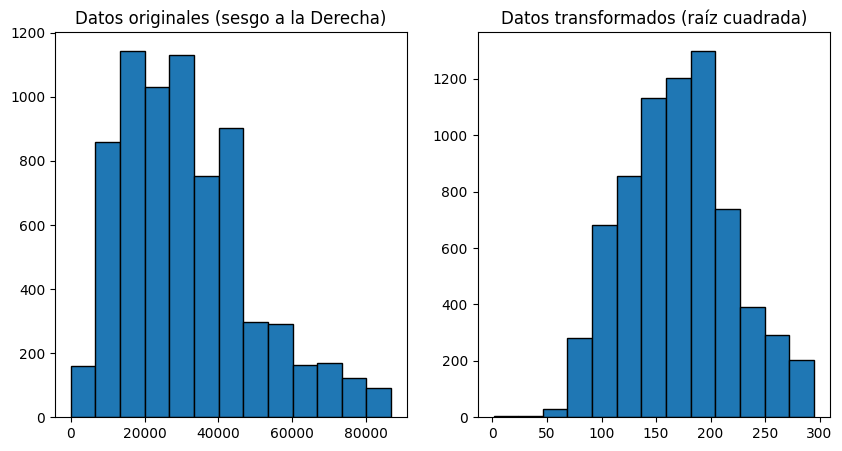

In [99]:
datos_transformados_raiz = np.sqrt(books_no_Out['Price'])
num_barrs = int(1+np.log2(len(books_no_Out['Price'])))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(books_no_Out['Price'], bins=num_barrs, edgecolor='black')
plt.title('Datos originales (sesgo a la Derecha)')

plt.subplot(1, 2, 2)
plt.hist(datos_transformados_raiz, bins=num_barrs, edgecolor='black')
plt.title('Datos transformados (raíz cuadrada)')
plt.show()

In [100]:
# data_books['Price'] = datos_transformados_raiz

In [101]:
data_books.head()

,Title,Author,Type,Price,Rating,Tags
0,the_complete_novel_of_sherlock_holmes,arthur_conan_doyle,paperback,16900.0,4.4,"[arts, film, photography, cinema, broadcast]"
1,black_holes_(l)_:_the_reith_lectures_[paperbac...,stephen_hawking,paperback,9900.0,4.5,"[arts, film, photography, cinema, broadcast]"
2,the_kite_runner,khaled_hosseini,kindle edition,17575.0,4.6,"[arts, film, photography, cinema, broadcast]"
3,greenlights:_raucous_stories_and_outlaw_wisdom...,matthew_mcconaughey,paperback,38900.0,4.6,"[arts, film, photography, cinema, broadcast]"
4,the_science_of_storytelling:_why_stories_make_...,will_storr,paperback,34816.0,4.5,"[arts, film, photography, cinema, broadcast]"


In [102]:
authors = data_books['Author'].value_counts().head(5).index
n_books = data_books['Author'].value_counts().head(5).values

In [103]:
color_palette = ['#440154', '#482878', '#3e4a89', '#31688e', '#26828e', '#1f9e89', 
                 '#35b779', '#6dcd59', '#b4de2c', '#fde725', '#ff7f00', '#ffa07a', 
                 '#6495ed', '#8a2be2', '#da70d6', '#20b2aa']

graph_books_authors = go.Figure([go.Bar(y=authors[::-1], x=n_books[::-1],orientation='h', marker_color=color_palette)])


graph_books_authors.update_layout(title='Top 5 Cantidad de ventas por autor', 
                                  xaxis_title='Autores',
                                  yaxis_title='N libros')
graph_books_authors.show()

In [104]:
authors_ra = data_books[['Author','Rating']][data_books['Author'].isin(authors)].groupby('Author')['Rating'].mean().index
rating_avg = data_books[['Author','Rating']][data_books['Author'].isin(authors)].groupby('Author')['Rating'].mean()

In [105]:
fig_rat = go.Figure([go.Bar(x=authors_ra,y=rating_avg,marker_color=color_palette)])
fig_rat.update_layout(
    yaxis_range=[4.1, 5.0],
    xaxis_title='Autores',
    yaxis_title='Rating promedio',
    title='Gráfico de Barras del rating en autores TOP ventas'
)
fig_rat.show()

In [106]:
bar_type = exp.bar(data_books['Type'].value_counts().head(5))
bar_type.update_traces(marker_color=color_palette)
bar_type.update_layout(showlegend=False, 
                       title='Tipo de encuadernización con mayor uso en publicaciones (Top 5)',
                       xaxis_title='Tipo de encuadernización',
                       yaxis_title='Total publicaciones por encuadernización')

In [107]:
data_books

,Title,Author,Type,Price,Rating,Tags
0,the_complete_novel_of_sherlock_holmes,arthur_conan_doyle,paperback,16900.0,4.4,"[arts, film, photography, cinema, broadcast]"
1,black_holes_(l)_:_the_reith_lectures_[paperbac...,stephen_hawking,paperback,9900.0,4.5,"[arts, film, photography, cinema, broadcast]"
2,the_kite_runner,khaled_hosseini,kindle edition,17575.0,4.6,"[arts, film, photography, cinema, broadcast]"
3,greenlights:_raucous_stories_and_outlaw_wisdom...,matthew_mcconaughey,paperback,38900.0,4.6,"[arts, film, photography, cinema, broadcast]"
4,the_science_of_storytelling:_why_stories_make_...,will_storr,paperback,34816.0,4.5,"[arts, film, photography, cinema, broadcast]"
...,...,...,...,...,...,...
7923,insight_guides_poland_(travel_guide_with_free_...,insight_travel_guide,paperback,132600.0,4.7,"[travel, travel, holiday_guides]"
7924,lonely_planet_india_19_(travel_guide),anirban_mahapatra,paperback,85000.0,4.4,"[travel, travel, holiday_guides]"
7925,eyewitness_travel_phrase_book_french_(ew_trave...,dk,paperback,30700.0,4.5,"[travel, travel, holiday_guides]"
7926,lonely_planet_australia_(travel_guide),andrew_bain,kindle edition,181450.0,4.7,"[travel, travel, holiday_guides]"
